In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("QualityPrediction.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking the shape of dataset
df.shape

(1599, 12)

##### The describe () function in Pandas gives us the descriptive statistical analysis of the data

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###### Observations:
Here as you can notice the mean value is less than the median value of each column. Median is represented by 50%(50th percentile) in the index column.This signifies the presence of Outliers. For example, a data set includes values: 30, 31, 32, and 2. The mean value (23.75), which is lower than the median of the data (30.5), is greatly affected by the extreme data point(2).

There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th %tile)

Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset

In [6]:
#give basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- Observations: 
The data has only float and integer values.
There are no missing values

In [7]:
#to see whether we have any missing values in our dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### checking for outliers in the dataset

<AxesSubplot:xlabel='fixed acidity'>

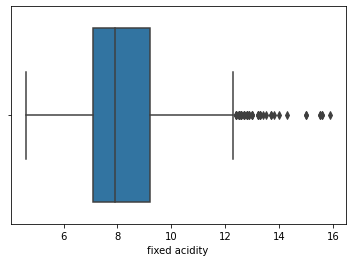

In [8]:
sns.boxplot(df['fixed acidity'])

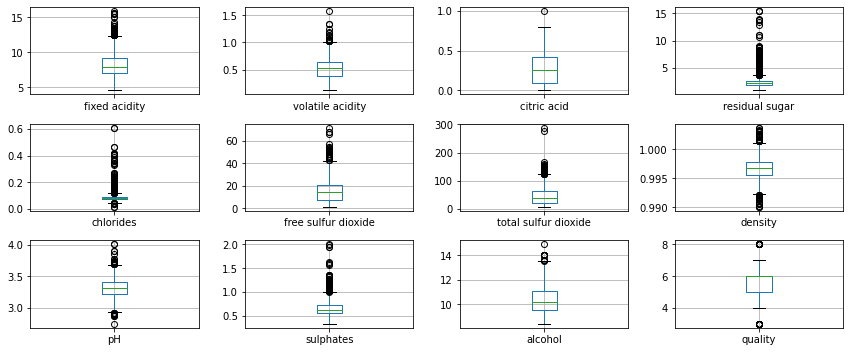

In [9]:
df.plot(kind='box',subplots=True,grid=True,layout = (3,4),figsize = (12,5))
plt.tight_layout()
plt.show()

In [10]:
from scipy import stats
z = np.abs(stats.zscore(df.iloc[:,:-1]))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 1.28864292 0.57920652 0.96024611]
 [0.29854743 1.96744245 1.39147228 ... 0.7199333  0.1289504  0.58477711]
 [0.29854743 1.29706527 1.18607043 ... 0.33117661 0.04808883 0.58477711]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.70550789 0.54204194 0.54162988]
 [1.39015528 0.65462046 0.77526673 ... 1.6773996  0.30598963 0.20930812]
 [1.33270223 1.21684919 1.02199944 ... 0.51112954 0.01092425 0.54162988]]


In [11]:
#creating a new dataframe after removing outliers
df = df[(z < 3).all(axis = 1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##### Let's do some plotting to know how the data columns are distributed in the dataset

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

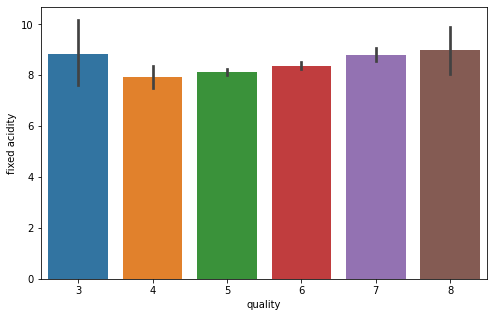

In [12]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

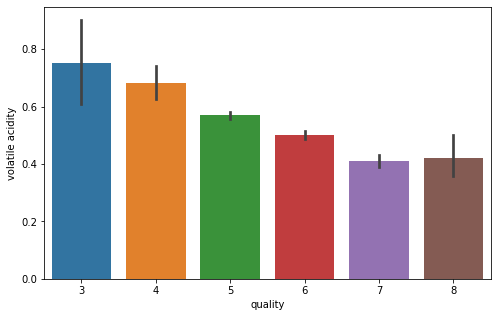

In [13]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

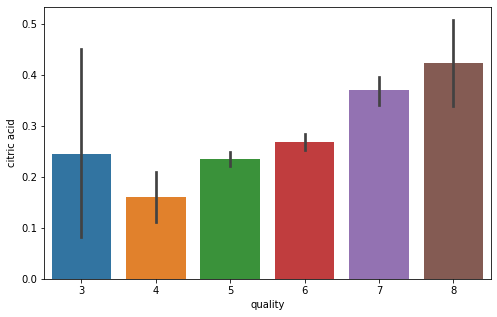

In [14]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (8,5))
sns.barplot(x = df.quality, y = df['citric acid'])

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

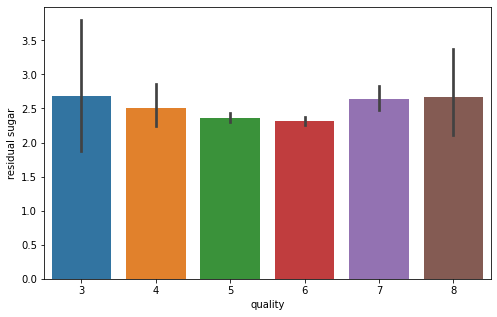

In [15]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = df['quality'], y = df['residual sugar'])

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

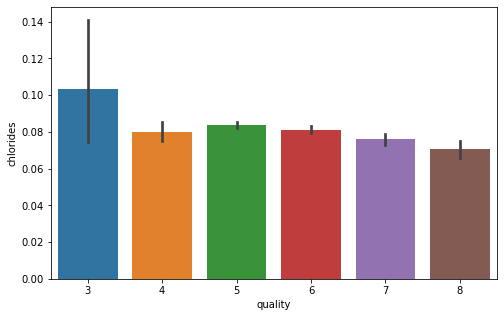

In [16]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (8,5))
sns.barplot(x = df['quality'], y = df['chlorides'])

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

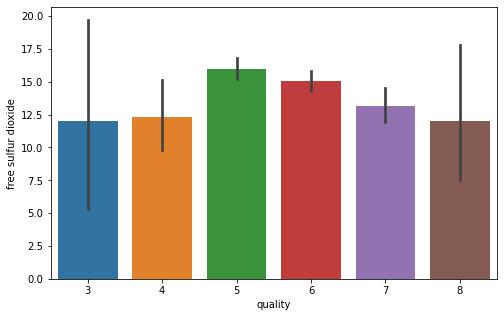

In [17]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

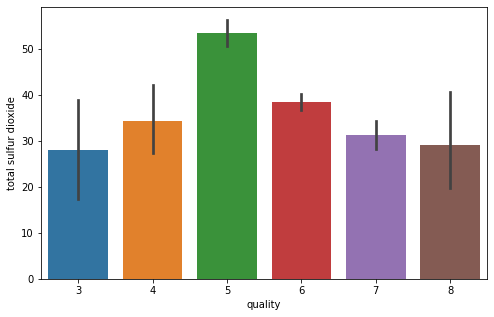

In [18]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

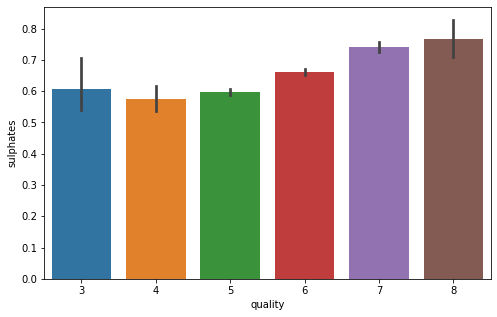

In [19]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

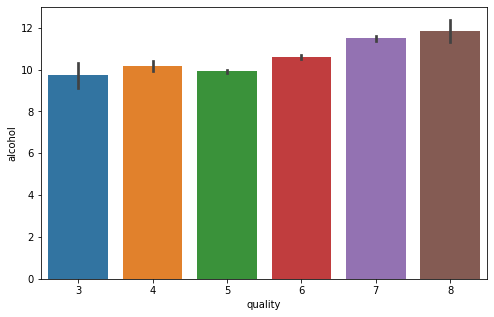

In [20]:
#Alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', y = 'alcohol', data = df)


<AxesSubplot:>

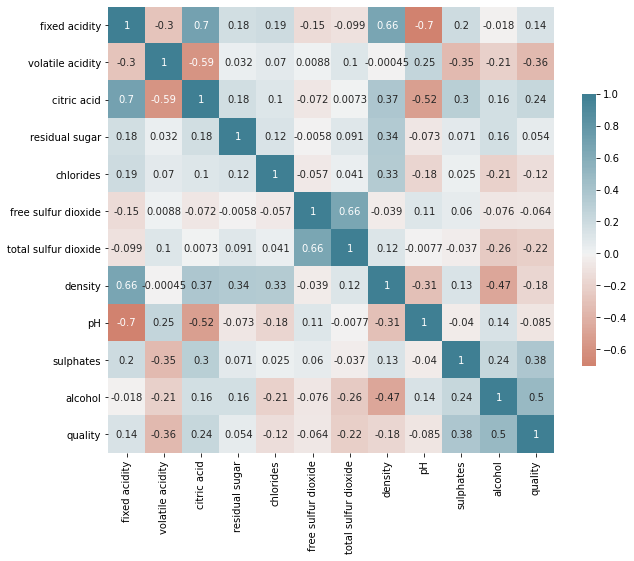

In [21]:
#lets plot the correlation metrics among our independent and dependent variables
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), # The data to plot
     center=0, annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, 
    cbar_kws={"shrink": .5})  # Extra kwargs for the legend; in this case, shrink by 50%)

- Observation:

From above heatmap we can see that there is a good correlation between alcohol,citric acid and sulphates(independent variable) and quality(target variable)

we can also observe that there is a relative positive correlation between fixed_acidity and citric_acid, fixed_acidity and density and between free sulfur dioxide and total sulfur dioxide.

Similarly we can observe there is a relatively high negative correlation between fixed_acidity and pH.

#### Analysis on Target Variable(Quality)

In [22]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [23]:
df['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
3      7
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

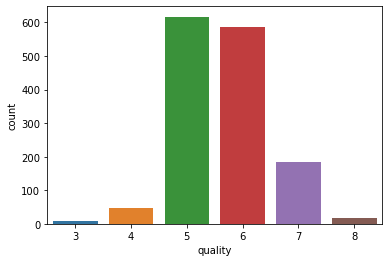

In [24]:
sns.countplot(df['quality'])

- Observation:
As we can see the taget variable(Quality) have a set of values ranging from 3 to 8, 3 being poor and 8 being best
Hence cutting down the range into three classes by labelling 3,4 as 0 class and 5,6 as 1 class and 7,8 as 2 class.

In [25]:
df['Quality_Review'] = df['quality'].apply(lambda x : 2 if x >=7 else 1 if x>=5 else 0 )

In [26]:
df['Quality_Review'].value_counts()

1    1203
2     201
0      54
Name: Quality_Review, dtype: int64

In [27]:
df.drop('quality' , axis =1,inplace = True)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Quality_Review'],
      dtype='object')

##### Separating the dataset as response variable and feature variabes

In [28]:
x = df.drop('Quality_Review', axis = 1)
y = df['Quality_Review']

#### Splitting the data

In [29]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#### visualizing independent variables

<AxesSubplot:ylabel='Density'>

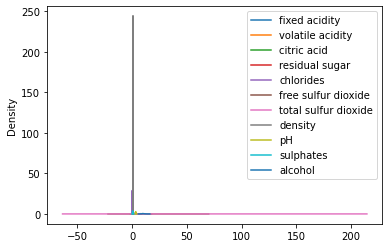

In [30]:
df.drop('Quality_Review', axis = 1).plot.kde()

- Observation:

Since, our feature variables are in different range we need to bring them down to a similar range using any of the feature scaling methods

##### Feature Scaling
To compare between two variable we need to bring them into same scale this is called as feature scaling.

<AxesSubplot:ylabel='Density'>

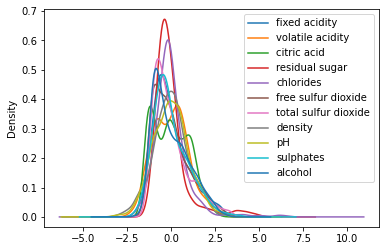

In [31]:
# #Using Standard scaler method for feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# new_x_train = sc.fit_transform(X_train)
# new_df =  pd.DataFrame(new_x_train ,columns = df.columns[:-1])
# new_x_test = sc.transform(X_test)
# new_df.plot.kde()

- Obsevation: 

As standard scaler works properly for normally distributed data, and since our features are not normally distributed we opt for Robust Scaler as it normalizes our data properly even if outliers are present in the data


In [32]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler()  
X_train =rc.fit_transform(X_train)
X_test = rc.transform(X_test)
df_scaled = pd.DataFrame(X_train ,columns = df.columns[:-1])
df_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.05,0.000000,-0.636364,-0.714286,-0.157895,0.307692,-0.131579,-0.138889,0.105263,-0.352941,-0.0625
1,-1.25,0.852792,-0.484848,-0.714286,0.526316,0.230769,-0.263158,-1.240741,1.894737,-0.352941,0.9375
2,0.20,0.284264,0.000000,0.000000,2.052632,-0.307692,0.052632,-0.250000,-0.842105,-0.529412,-0.1875
3,0.00,-0.527919,0.121212,-0.571429,4.105263,-0.923077,0.210526,0.277778,-0.052632,1.764706,-0.3750
4,0.70,0.994924,0.060606,0.857143,-0.052632,0.846154,0.526316,0.787037,0.000000,0.294118,0.3125
...,...,...,...,...,...,...,...,...,...,...,...
1015,-0.35,-0.690355,0.636364,-0.142857,-0.263158,0.846154,0.210526,-0.629630,0.473684,1.352941,0.5625
1016,0.55,-0.527919,0.484848,-0.285714,-1.105263,0.153846,0.105263,-1.185185,-0.473684,-0.117647,1.3125
1017,0.20,-1.096447,0.363636,-1.142857,-0.157895,-0.384615,-0.342105,0.324074,-0.263158,0.470588,-0.3125
1018,-0.15,-0.406091,0.454545,0.714286,0.157895,-0.538462,-0.657895,-0.611111,0.684211,-0.470588,1.3125


<AxesSubplot:ylabel='Density'>

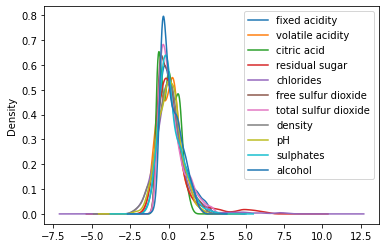

In [33]:
df_scaled.plot.kde()

### Model Creation

In [34]:
#Initializing empty dictionary to append different models accuracy
model_accuracy = {}
model_accuracy

{}

#### Logistic Regression

In [35]:
# Fitting Logistic Regression to the Training set
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
# predicting cross validation score
cv_lr = cross_val_score(estimator = lr, X = rc.fit_transform(x), y = y, cv = 10)
print("CV accuracy_mean: ", cv_lr.mean())
print("CV acuuracy_std: ", cv_lr.std())
model_accuracy['Logistic Regression'] =  cv_lr.mean()

y_pred_lr_train = lr.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_train)

y_pred_lr_test = lr.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_test)

CV accuracy_mean:  0.8381388757675957
CV acuuracy_std:  0.01788317897379679
Training set:  0.8470588235294118
Test set:  0.8561643835616438


In [37]:
con_mat = confusion_matrix(y_test,y_pred_lr_test)
print(con_mat)
classifcation_report = classification_report(y_test,y_pred_lr_test)
print(classifcation_report)


[[  0  11   0]
 [  1 355   9]
 [  0  42  20]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.97      0.92       365
           2       0.69      0.32      0.44        62

    accuracy                           0.86       438
   macro avg       0.52      0.43      0.45       438
weighted avg       0.82      0.86      0.83       438




### Decision Tree

In [38]:
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### Finding best parameters for model to obtain generalized results

In [39]:
random_state = 42
param_grid_array = {"criterion" : ["gini", "entropy"],
                    "max_depth" : range(4,10),
                    "max_features" :['auto', 'sqrt', 'log2', None]
                   }

grid_search = GridSearchCV(classifier_dt,param_grid = param_grid_array,n_jobs = -1,cv = 5)
grid_search.fit(x,y)
print(grid_search.best_params_)
print(grid_search.best_score_)
model_accuracy['Decision Tree'] =  grid_search.best_score_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}
0.8319540554535612


In [75]:
classifier_dt = DecisionTreeClassifier(criterion =  'gini', max_depth = 5, max_features =  'log2')
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2')

In [76]:
# Predicting Cross Validation Score
# cv_dt = cross_val_score(estimator = classifier_dt, X = x, y = y, cv = 10)
# print("CV mean_accuracy: ", cv_dt.mean())
# print("CV accuracy_std: ", cv_dt.std())

y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)
# print('----------')
# print(classifier_dt.score(X_test,y_test))

Training set:  0.8784313725490196
Test set:  0.8127853881278538


In [77]:
con_mat = confusion_matrix(y_test,y_pred_dt_test)
print(con_mat)
classifcation_report = classification_report(y_test,y_pred_dt_test)
print(classifcation_report)


[[  0  11   0]
 [  6 340  19]
 [  0  46  16]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      0.93      0.89       365
           2       0.46      0.26      0.33        62

    accuracy                           0.81       438
   macro avg       0.44      0.40      0.41       438
weighted avg       0.78      0.81      0.79       438



In [78]:
# pip install graphviz
# conda install graphviz
# !pip install pydotplus
from io import StringIO
import pydotplus
from PIL import Image
from IPython.display import Image
from six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz

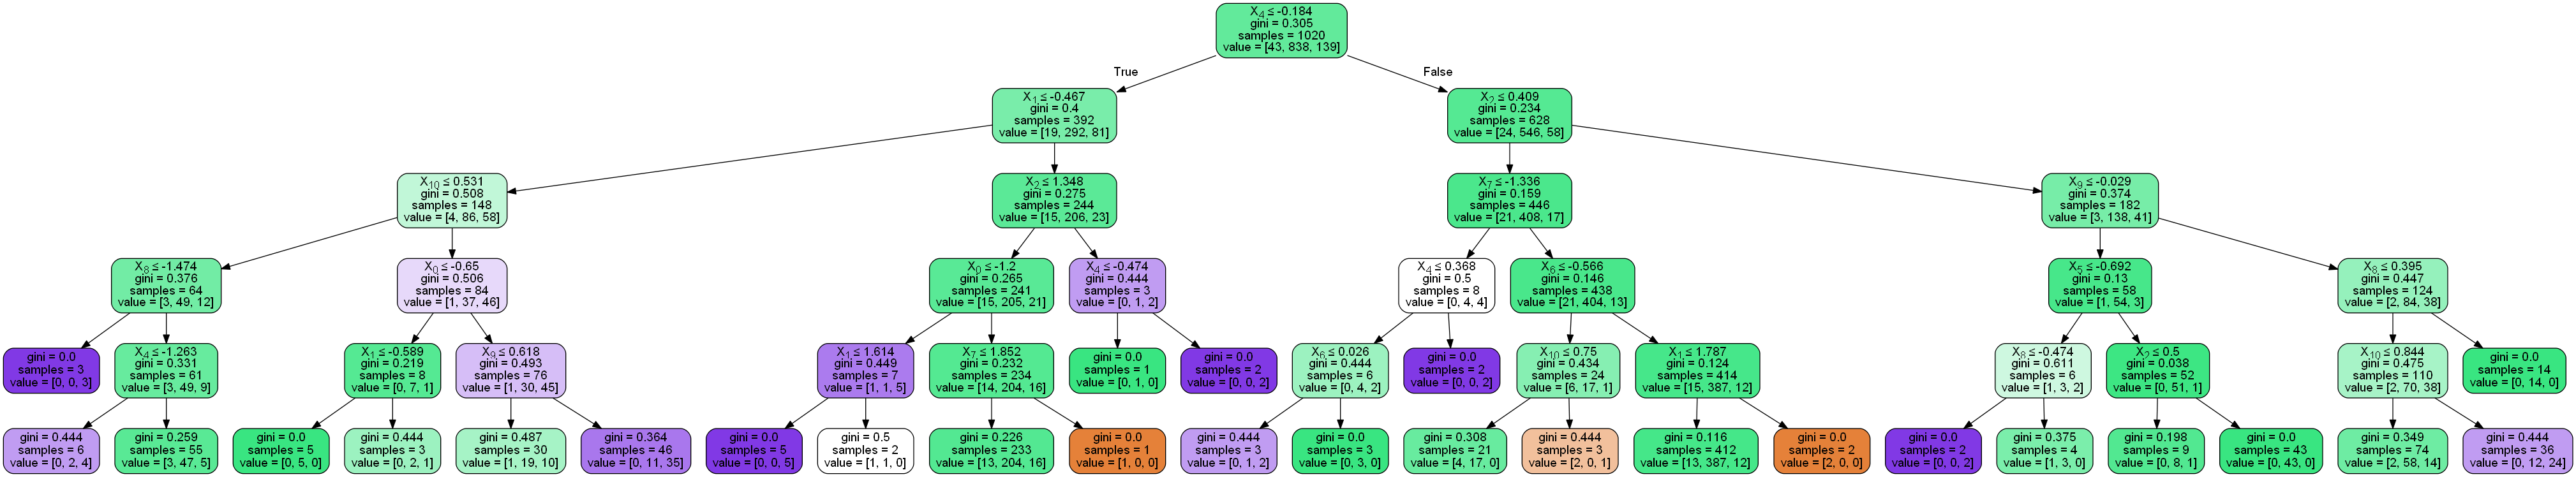

<Figure size 720x576 with 0 Axes>

In [79]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(classifier_dt,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


##### Random forest

In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
random_state = 42
param_grid_array = {"n_estimators" :[200],
                    "criterion" : ["gini", "entropy"],
                    "max_depth" : range(4,10),
                    "max_features" :['auto', 'sqrt', 'log2', None],
                    "bootstrap": [True, False]
                   }

grid_search = GridSearchCV(rfc,param_grid = param_grid_array,n_jobs = -1,cv = 5)
grid_search.fit(x,y)
print(grid_search.best_params_)
print(grid_search.best_score_)
model_accuracy['Random forest'] =  grid_search.best_score_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.8511768582591912


In [80]:
rfc = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = 4, max_features ='sqrt',n_estimators = 200)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=200)

In [81]:
# Predicting Cross Validation Score
# cv_rfc = cross_val_score(estimator = rfc, X = x, y = y, cv = 10)
# print("CV mean_accuracy: ", cv_rfc.mean())
# print("CV accuracy_std: ", cv_rfc.std())

y_pred_rfc_train =rfc.predict(X_train)
accuracy_rfc_train = accuracy_score(y_train, y_pred_rfc_train)
print("Training set: ", accuracy_rfc_train)

y_pred_rfc_test = rfc.predict(X_test)
accuracy_rfc_test = accuracy_score(y_test, y_pred_rfc_test)
print("Test set: ", accuracy_rfc_test)

Training set:  0.8715686274509804
Test set:  0.8584474885844748


In [82]:
con_mat = confusion_matrix(y_test,y_pred_rfc_test)
print(con_mat)
classifcation_report = classification_report(y_test,y_pred_rfc_test)
print(classifcation_report)

[[  0  11   0]
 [  0 361   4]
 [  0  47  15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      0.99      0.92       365
           2       0.79      0.24      0.37        62

    accuracy                           0.86       438
   macro avg       0.55      0.41      0.43       438
weighted avg       0.83      0.86      0.82       438



#### K-Nearest Neighbour

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### find the optimum value for nearest neighbors(k-value)

In [49]:
accuracy = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn ,x,y,cv =10)
    accuracy.append(score.mean())


Text(0, 0.5, 'Accuracy Rate')

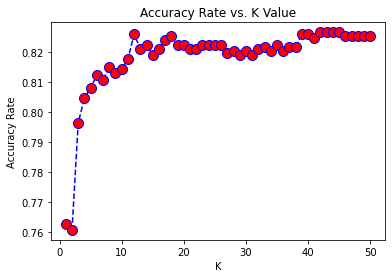

In [50]:
plt.plot(range(1,51),accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

- observation:

From the above accuracy v/s k-value graph we can notice that accuracy is consistent when k is 41-44 and 45-50, so selecting the nearest neighbors as 45.


##### Another way for determining k-value can b thro hyper parameter tunning, hence using grid search cv method for finding optimum k value

In [64]:
param_grid = {'n_neighbors': range(1,50),
              'p': [1,2]} 
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5 , verbose = 3,n_jobs = -1)
grid_search.fit(rc.fit_transform(x),y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
#print(grid_search.cv_results_)
model_accuracy['KNN'] = grid_search.best_score_

Fitting 5 folds for each of 98 candidates, totalling 490 fits
KNeighborsClassifier(n_neighbors=49, p=1)
0.8347055500635504


In [65]:
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=49)

In [70]:
# Predicting Cross Validation Score
# cv_knn = cross_val_score(estimator = knn,X = x , y = y, cv = 10)
# print("CV mean_accuracy: ", cv_knn.mean())
# print("CV accuracy_std: ", cv_knn.std())

y_pred_knn_train =knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

Training set:  0.8313725490196079
Test set:  0.8538812785388128


##### Comparing accuracy of different classifiers

In [54]:
model_accuracy

{'Logistic Regression': 0.8381388757675957,
 'Decision Tree': 0.8319540554535612,
 'Random forest': 0.8511768582591912,
 'KNN': 0.8347055500635504}

In [55]:
accuracy_df = pd.DataFrame({'Classifier': model_accuracy.keys(),
                            'Accuracy': model_accuracy.values()})
accuracy_df

,Classifier,Accuracy
0,Logistic Regression,0.838139
1,Decision Tree,0.831954
2,Random forest,0.851177
3,KNN,0.834706


<AxesSubplot:xlabel='Classifier', ylabel='Accuracy'>

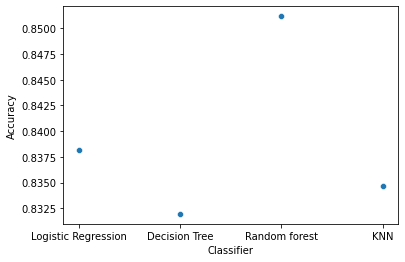

In [56]:
sns.scatterplot(accuracy_df.Classifier,accuracy_df.Accuracy)

- Observation:

From the above Scatter Plot we can conclude that Random Forest out performed other classifiers with an accuracy of 85% where as the Decision Tree Classifier gave least accuracy of 83.1% in classification

In [74]:
# !pip install -U notebook-as-pdf
# !pyppeteer-install
